In [1]:
import pandas as pd
import numpy as np 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from  scipy.stats  import  shapiro 
from  scipy.stats  import  normaltest

In [2]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("C:/Users/MX03932000/Downloads/telco_churn_ejemplo.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#modificamos nuestra tgt


In [6]:
#si lo abandono 1, no lo hizo 0
df["Churn"]=df["Churn"].replace({"No":0,"Yes":1})

In [7]:
df["Churn"].value_counts(1)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

In [8]:
#validamos duplicados
df.duplicated().sum()

0

In [9]:
#no hay duplicadps en id
df[df.duplicated(subset=["customerID"],keep=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [10]:
for col in df:
    print(col)
    display(df[col].value_counts())
    print("\n")

customerID


2674-MIAHT    1
5624-BQSSA    1
7422-WNBTY    1
8734-DKSTZ    1
3489-VSFRD    1
             ..
2187-PKZAY    1
1971-DTCZB    1
4114-QMKVN    1
4456-RHSNB    1
9068-FHQHD    1
Name: customerID, Length: 7032, dtype: int64



gender


Male      3549
Female    3483
Name: gender, dtype: int64



SeniorCitizen


0    5890
1    1142
Name: SeniorCitizen, dtype: int64



Partner


No     3639
Yes    3393
Name: Partner, dtype: int64



Dependents


No     4933
Yes    2099
Name: Dependents, dtype: int64



tenure


1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64



PhoneService


Yes    6352
No      680
Name: PhoneService, dtype: int64



MultipleLines


No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64



InternetService


Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64



OnlineSecurity


No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64



OnlineBackup


No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64



DeviceProtection


No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64



TechSupport


No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64



StreamingTV


No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64



StreamingMovies


No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64



Contract


Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64



PaperlessBilling


Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64



PaymentMethod


Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64



MonthlyCharges


20.05    61
19.90    44
19.95    44
19.85    44
19.65    43
         ..
39.95     1
18.55     1
39.55     1
18.75     1
97.25     1
Name: MonthlyCharges, Length: 1584, dtype: int64



TotalCharges


20.20      11
19.75       9
20.05       8
19.65       8
19.90       8
           ..
6424.70     1
1474.35     1
6668.35     1
6096.90     1
5867.00     1
Name: TotalCharges, Length: 6530, dtype: int64



Churn


0    5163
1    1869
Name: Churn, dtype: int64

In [11]:
#renombrar columnas


In [12]:
id_feats=['customerID']
c_feats=['tenure','MonthlyCharges','TotalCharges',]
v_feats=['gender',"SeniorCitizen",'Partner','Dependents','PhoneService'
    ,'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
   'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']


In [13]:
c_feats_new=["c_"+x for x in c_feats]
v_feats_new=["v_"+x for x in v_feats]
id_feats_new=["id_"+x for x in id_feats]

In [14]:

df.rename(columns=dict(zip(v_feats,v_feats_new)),inplace=True)
df.rename(columns=dict(zip(c_feats,c_feats_new)),inplace=True)
df.rename(columns=dict(zip(id_feats,id_feats_new)),inplace=True)

In [15]:
df.head()

,id_customerID,v_gender,v_SeniorCitizen,v_Partner,v_Dependents,c_tenure,v_PhoneService,v_MultipleLines,v_InternetService,v_OnlineSecurity,...,v_DeviceProtection,v_TechSupport,v_StreamingTV,v_StreamingMovies,v_Contract,v_PaperlessBilling,v_PaymentMethod,c_MonthlyCharges,c_TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [16]:
#df['v_gender']=df['v_gender'].replace({"Female":0,"Male":1})

In [17]:
#df['v_PhoneService']=df['v_PhoneService'].replace({"No":0,"Yes":1})

In [18]:
#df['v_PhoneService'].value_counts()

In [19]:
#continuas a discretas

In [20]:
for col in df.filter(like="c_"):
    print(col)

c_tenure
c_MonthlyCharges
c_TotalCharges


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
from sklearn import tree
filterwarnings("ignore")

In [22]:
dt = DecisionTreeClassifier(max_depth=11, min_samples_leaf=0.08, max_features=1,random_state=0)

In [23]:
def cuts(df,feature,tgt):
    df[feature]=df[feature].astype(float)
    dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.08, max_features=1,random_state=0)
    X = df.loc[df[feature].notnull(), [feature]]
    y = df.loc[df[feature].notnull(), tgt]
    dt.fit(X, y)
    df.loc[df[feature].notnull(), f"aux_{feature}"] = dt.apply(X)
    aux = df[[f"aux_{feature}", feature]].groupby([f"aux_{feature}"]).agg(["min", "max"])
    aux.columns = aux.columns.droplevel(0)
    aux[f"Interval_{feature}"]= aux.apply(lambda x:[x['min'],x['max']],axis=1)
    inter_list=aux[f"Interval_{feature}"].tolist()
    inter_list[0][0]=-np.Inf
    inter_list[-1][-1]=np.Inf
    inter_list=pd.IntervalIndex.from_tuples(list(map(tuple,inter_list)),closed="both")
    name=feature.replace("c_","")
    df[f"v_arbol_{name}"]=pd.cut(df[feature].astype(float),bins=inter_list)
    df.drop(columns=[f"aux_{feature}"],inplace=True)
    return df

In [24]:
for col in df.filter(like="c_"):
    print(col)
    df=cuts(df,col,"Churn")

c_tenure
c_MonthlyCharges
c_TotalCharges


In [25]:
def grafica(df,col):
    sns.distplot(limpios_out_age["c_AGE"], bins=10)

In [26]:
df_aux=df.copy()


<AxesSubplot:xlabel='c_tenure', ylabel='Density'>

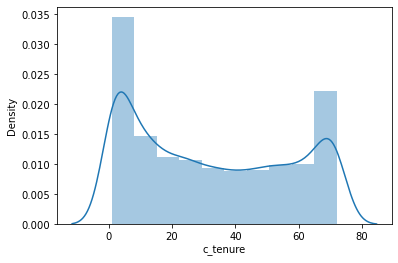

In [27]:
sns.distplot(df_aux["c_tenure"], bins=10)

<AxesSubplot:xlabel='c_MonthlyCharges', ylabel='Density'>

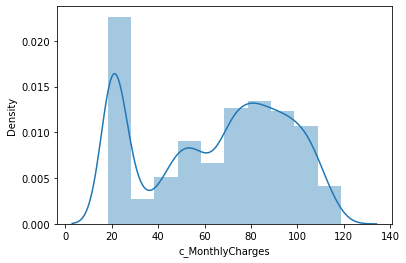

In [28]:
sns.distplot(df_aux["c_MonthlyCharges"], bins=10)

<AxesSubplot:xlabel='c_TotalCharges', ylabel='Density'>

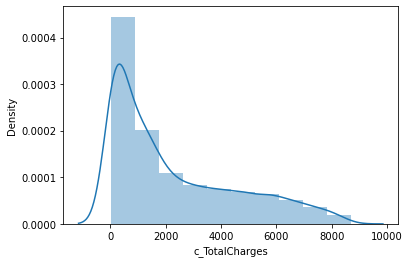

In [29]:
sns.distplot(df_aux["c_TotalCharges"], bins=10)


In [30]:
df

,id_customerID,v_gender,v_SeniorCitizen,v_Partner,v_Dependents,c_tenure,v_PhoneService,v_MultipleLines,v_InternetService,v_OnlineSecurity,...,v_StreamingMovies,v_Contract,v_PaperlessBilling,v_PaymentMethod,c_MonthlyCharges,c_TotalCharges,Churn,v_arbol_tenure,v_arbol_MonthlyCharges,v_arbol_TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,"[-inf, 1.0]","[28.45, 55.95]","[-inf, 73.45]"
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,0,"[26.0, 40.0]","[56.0, 68.8]","[1183.05, 2088.45]"
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,"[2.0, 5.0]","[28.45, 55.95]","[73.5, 198.0]"
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,"[41.0, 49.0]","[28.45, 55.95]","[1183.05, 2088.45]"
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,"[2.0, 5.0]","[68.85, 85.8]","[73.5, 198.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.50,0,"[17.0, 25.0]","[68.85, 85.8]","[1183.05, 2088.45]"
7028,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,"[70.0, inf]","[93.7, 104.4]","[5645.8, inf]"
7029,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,"[11.0, 16.0]","[28.45, 55.95]","[198.1, 390.85]"
7030,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,"[2.0, 5.0]","[68.85, 85.8]","[198.1, 390.85]"


In [31]:
def completitud(df):
    comple=pd.DataFrame(df.isnull().sum())
    comple.reset_index(inplace=True)
    comple=comple.rename(columns={"index":"columna",0:"total"})
    comple["completitud"]=(1-comple["total"]/df.shape[0])*100
    comple=comple.sort_values(by="completitud",ascending=True)
    comple.reset_index(drop=True,inplace=True)
    return comple

In [32]:
completitud(df)

,columna,total,completitud
0,id_customerID,0,100.0
1,v_arbol_tenure,0,100.0
2,Churn,0,100.0
3,c_TotalCharges,0,100.0
4,c_MonthlyCharges,0,100.0
5,v_PaymentMethod,0,100.0
6,v_PaperlessBilling,0,100.0
7,v_Contract,0,100.0
8,v_StreamingMovies,0,100.0
9,v_StreamingTV,0,100.0


In [33]:
#train and test

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
df.filter(like="v_").columns

Index(['v_gender', 'v_SeniorCitizen', 'v_Partner', 'v_Dependents',
       'v_PhoneService', 'v_MultipleLines', 'v_InternetService',
       'v_OnlineSecurity', 'v_OnlineBackup', 'v_DeviceProtection',
       'v_TechSupport', 'v_StreamingTV', 'v_StreamingMovies', 'v_Contract',
       'v_PaperlessBilling', 'v_PaymentMethod', 'v_arbol_tenure',
       'v_arbol_MonthlyCharges', 'v_arbol_TotalCharges'],
      dtype='object')

In [36]:
X=df[['v_gender', 'v_SeniorCitizen', 'v_Partner', 'v_Dependents',
       'v_PhoneService', 'v_MultipleLines', 'v_InternetService',
       'v_OnlineSecurity', 'v_OnlineBackup', 'v_DeviceProtection',
       'v_TechSupport', 'v_StreamingTV', 'v_StreamingMovies', 'v_Contract',
       'v_PaperlessBilling', 'v_PaymentMethod', 'v_arbol_tenure',
       'v_arbol_MonthlyCharges', 'v_arbol_TotalCharges','Churn']]

In [37]:
X_train,X_test=train_test_split(X,random_state=0,stratify=X["Churn"])

In [38]:
X_train["Churn"].value_counts(1)

0    0.734168
1    0.265832
Name: Churn, dtype: float64

In [39]:
X_test["Churn"].value_counts(1)

0    0.734357
1    0.265643
Name: Churn, dtype: float64

In [40]:
#WOE

In [41]:
X_train.head()

,v_gender,v_SeniorCitizen,v_Partner,v_Dependents,v_PhoneService,v_MultipleLines,v_InternetService,v_OnlineSecurity,v_OnlineBackup,v_DeviceProtection,v_TechSupport,v_StreamingTV,v_StreamingMovies,v_Contract,v_PaperlessBilling,v_PaymentMethod,v_arbol_tenure,v_arbol_MonthlyCharges,v_arbol_TotalCharges,Churn
1715,Female,1,No,No,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),"[2.0, 5.0]","[68.85, 85.8]","[73.5, 198.0]",0
6648,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),"[41.0, 49.0]","[20.1, 26.9]","[391.7, 1182.55]",0
4949,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,"[11.0, 16.0]","[20.1, 26.9]","[198.1, 390.85]",0
4673,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,"[6.0, 10.0]","[68.85, 85.8]","[391.7, 1182.55]",1
3503,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,"[-inf, 1.0]","[28.45, 55.95]","[-inf, 73.45]",0


In [42]:
def WOE(X_aux,feature,tgt):
    aux = X_aux[[feature, tgt]].groupby(feature).agg(["count", "sum"])
    aux["evento"] = aux[tgt, "sum"]
    aux["no_evento"] = aux[tgt, "count"] - aux[tgt, "sum"]
    aux["%evento"] = aux["evento"] / aux["evento"].sum()
    aux["%no_evento"] = aux["no_evento"] / aux["no_evento"].sum()
    aux["WOE"] = np.log(aux["%evento"] / aux["%no_evento"])
    print(feature)
    iv=((aux["%evento"] - aux["%no_evento"])*aux["WOE"]).sum()
    print(f"IV : {iv}")
    aux.columns = aux.columns.droplevel(1)
    aux = aux[["WOE"]].reset_index().rename(columns={"WOE": f"W_{feature}"})
    #X_aux = X_aux.merge(aux, on=feature, how="left")
    return aux,iv

In [43]:
aux=X_train.copy()

In [44]:
for col in aux:
    display(WOE(aux,col,"Churn"))
    
    print("\n")

v_gender
IV : 0.0024203615472967177


(  v_gender  W_v_gender
 0   Female    0.049009
 1     Male   -0.049396,
 0.0024203615472967177)



v_SeniorCitizen
IV : 0.1048832948616708


(   v_SeniorCitizen  W_v_SeniorCitizen
 0                0          -0.158986
 1                1           0.665483,
 0.1048832948616708)



v_Partner
IV : 0.12732168483005551


(  v_Partner  W_v_Partner
 0        No     0.318864
 1       Yes    -0.403570,
 0.12732168483005551)



v_Dependents
IV : 0.16059588708002756


(  v_Dependents  W_v_Dependents
 0           No        0.232425
 1          Yes       -0.700271,
 0.16059588708002756)



v_PhoneService
IV : 0.0001521018020732486


(  v_PhoneService  W_v_PhoneService
 0             No         -0.038173
 1            Yes          0.003985,
 0.0001521018020732486)



v_MultipleLines
IV : 0.005464391248076638


(    v_MultipleLines  W_v_MultipleLines
 0                No          -0.068255
 1  No phone service          -0.038173
 2               Yes           0.085238,
 0.005464391248076638)



v_InternetService
IV : 0.5929560774357707


(  v_InternetService  W_v_InternetService
 0               DSL            -0.431217
 1       Fiber optic             0.677632
 2                No            -1.474832,
 0.5929560774357707)



v_OnlineSecurity
IV : 0.7011971824330125


(      v_OnlineSecurity  W_v_OnlineSecurity
 0                   No            0.675248
 1  No internet service           -1.474832
 2                  Yes           -0.765853,
 0.7011971824330125)



v_OnlineBackup
IV : 0.5213350351585314


(        v_OnlineBackup  W_v_OnlineBackup
 0                   No          0.617647
 1  No internet service         -1.474832
 2                  Yes         -0.297688,
 0.5213350351585314)



v_DeviceProtection
IV : 0.4948888973454475


(    v_DeviceProtection  W_v_DeviceProtection
 0                   No              0.584543
 1  No internet service             -1.474832
 2                  Yes             -0.253889,
 0.4948888973454475)



v_TechSupport
IV : 0.7104483783786991


(         v_TechSupport  W_v_TechSupport
 0                   No         0.684094
 1  No internet service        -1.474832
 2                  Yes        -0.772825,
 0.7104483783786991)



v_StreamingTV
IV : 0.3617316341492085


(         v_StreamingTV  W_v_StreamingTV
 0                   No         0.325525
 1  No internet service        -1.474832
 2                  Yes         0.164541,
 0.3617316341492085)



v_StreamingMovies
IV : 0.36290460490654913


(     v_StreamingMovies  W_v_StreamingMovies
 0                   No             0.335646
 1  No internet service            -1.474832
 2                  Yes             0.158175,
 0.36290460490654913)



v_Contract
IV : 1.221387204954806


(       v_Contract  W_v_Contract
 0  Month-to-month      0.726191
 1        One year     -1.168488
 2        Two year     -2.408976,
 1.221387204954806)



v_PaperlessBilling
IV : 0.1987240471534243


(  v_PaperlessBilling  W_v_PaperlessBilling
 0                 No             -0.618826
 1                Yes              0.326512,
 0.1987240471534243)



v_PaymentMethod
IV : 0.4538145986462522


(             v_PaymentMethod  W_v_PaymentMethod
 0  Bank transfer (automatic)          -0.585198
 1    Credit card (automatic)          -0.655027
 2           Electronic check           0.834385
 3               Mailed check          -0.451477,
 0.4538145986462522)



v_arbol_tenure
IV : 0.8750696208299662


(  v_arbol_tenure  W_v_arbol_tenure
 0    [-inf, 1.0]          1.627140
 1     [2.0, 5.0]          0.902676
 2    [6.0, 10.0]          0.479343
 3   [11.0, 16.0]          0.388606
 4   [17.0, 25.0]         -0.039569
 5   [26.0, 40.0]         -0.300553
 6   [41.0, 49.0]         -0.558285
 7   [50.0, 59.0]         -0.814485
 8   [60.0, 69.0]         -1.324185
 9    [70.0, inf]         -2.255709,
 0.8750696208299662)



v_arbol_MonthlyCharges
IV : 0.453188877891767


(  v_arbol_MonthlyCharges  W_v_arbol_MonthlyCharges
 0          [-inf, 20.05]                 -1.253516
 1           [20.1, 26.9]                 -1.198303
 2         [28.45, 55.95]                  0.098751
 3           [56.0, 68.8]                 -1.047484
 4          [68.85, 85.8]                  0.544852
 5         [85.85, 93.65]                  0.258404
 6          [93.7, 104.4]                  0.622646
 7          [104.45, inf]                 -0.275387,
 0.453188877891767)



v_arbol_TotalCharges
IV : 0.37779303726927294


(  v_arbol_TotalCharges  W_v_arbol_TotalCharges
 0        [-inf, 73.45]                1.015871
 1        [73.5, 198.0]                0.971616
 2      [198.1, 390.85]                0.308540
 3     [391.7, 1182.55]                0.048556
 4   [1183.05, 2088.45]               -0.459263
 5   [2088.75, 3233.85]                0.091028
 6    [3236.35, 4335.2]               -0.770409
 7     [4338.6, 5643.4]               -0.486898
 8        [5645.8, inf]               -0.990999,
 0.37779303726927294)

ValueError: Grouper for 'Churn' not 1-dimensional

In [46]:
ivs=[]
feats=[]
interpre=[]
for col in X_train.filter(like="v_").columns:
    print(col)
    aux,iv=WOE(X_train,col,"Churn")
    feats.append(col)
    ivs.append(iv)
    x=iv
    interpretacion="sospechoso" if x>=.5 else "alto" if .3<=x and x<.5 else "medio" if x<.3 and x>=.1 else "bajo" if x<.1 and x>=.02 else "insuficiente"
    interpre.append(interpretacion)
    X_train=X_train.merge(aux, on=col, how="left")
    X_test=X_test.merge(aux, on=col, how="left")
    
#iv
data_iv=pd.DataFrame()
data_iv["iv"]=ivs
data_iv["feats"]=feats
data_iv["iv_inter"]=interpre
data_iv.sort_values(by="iv",ascending=False,inplace=True)
data_iv.reset_index(drop=True,inplace=True)

v_gender
v_gender
IV : 0.0024203615472967177
v_SeniorCitizen
v_SeniorCitizen
IV : 0.1048832948616708
v_Partner
v_Partner
IV : 0.12732168483005551
v_Dependents
v_Dependents
IV : 0.16059588708002756
v_PhoneService
v_PhoneService
IV : 0.0001521018020732486
v_MultipleLines
v_MultipleLines
IV : 0.005464391248076638
v_InternetService
v_InternetService
IV : 0.5929560774357707
v_OnlineSecurity
v_OnlineSecurity
IV : 0.7011971824330125
v_OnlineBackup
v_OnlineBackup
IV : 0.5213350351585314
v_DeviceProtection
v_DeviceProtection
IV : 0.4948888973454475
v_TechSupport
v_TechSupport
IV : 0.7104483783786991
v_StreamingTV
v_StreamingTV
IV : 0.3617316341492085
v_StreamingMovies
v_StreamingMovies
IV : 0.36290460490654913
v_Contract
v_Contract
IV : 1.221387204954806
v_PaperlessBilling
v_PaperlessBilling
IV : 0.1987240471534243
v_PaymentMethod
v_PaymentMethod
IV : 0.4538145986462522
v_arbol_tenure
v_arbol_tenure
IV : 0.8750696208299662
v_arbol_MonthlyCharges
v_arbol_MonthlyCharges
IV : 0.453188877891767
v_a

In [47]:
data_iv

,iv,feats,iv_inter
0,1.221387,v_Contract,sospechoso
1,0.875070,v_arbol_tenure,sospechoso
2,0.710448,v_TechSupport,sospechoso
3,0.701197,v_OnlineSecurity,sospechoso
4,0.592956,v_InternetService,sospechoso
5,0.521335,v_OnlineBackup,sospechoso
6,0.494889,v_DeviceProtection,alto
7,0.453815,v_PaymentMethod,alto
8,0.453189,v_arbol_MonthlyCharges,alto
9,0.377793,v_arbol_TotalCharges,alto


In [48]:
X_train.filter(like="W_")

,W_v_gender,W_v_SeniorCitizen,W_v_Partner,W_v_Dependents,W_v_PhoneService,W_v_MultipleLines,W_v_InternetService,W_v_OnlineSecurity,W_v_OnlineBackup,W_v_DeviceProtection,W_v_TechSupport,W_v_StreamingTV,W_v_StreamingMovies,W_v_Contract,W_v_PaperlessBilling,W_v_PaymentMethod,W_v_arbol_tenure,W_v_arbol_MonthlyCharges,W_v_arbol_TotalCharges
0,0.049009,0.665483,0.318864,0.232425,0.003985,-0.068255,0.677632,0.675248,-0.297688,0.584543,0.684094,0.164541,0.335646,0.726191,0.326512,-0.585198,0.902676,0.544852,0.971616
1,0.049009,-0.158986,-0.403570,0.232425,0.003985,-0.068255,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,-1.168488,-0.618826,-0.585198,-0.558285,-1.198303,0.048556
2,-0.049396,-0.158986,0.318864,0.232425,0.003985,-0.068255,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,0.726191,0.326512,0.834385,0.388606,-1.198303,0.308540
3,-0.049396,0.665483,0.318864,0.232425,0.003985,0.085238,0.677632,0.675248,0.617647,0.584543,0.684094,0.325525,0.158175,0.726191,0.326512,0.834385,0.479343,0.544852,0.048556
4,-0.049396,-0.158986,0.318864,0.232425,0.003985,-0.068255,-0.431217,0.675248,0.617647,0.584543,0.684094,0.325525,0.335646,0.726191,0.326512,-0.451477,1.627140,0.098751,1.015871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,-0.049396,0.665483,0.318864,0.232425,0.003985,0.085238,0.677632,0.675248,-0.297688,-0.253889,0.684094,0.164541,0.158175,0.726191,0.326512,0.834385,-0.039569,-0.275387,0.091028
5270,-0.049396,-0.158986,-0.403570,-0.700271,-0.038173,-0.038173,-0.431217,-0.765853,0.617647,0.584543,-0.772825,0.325525,0.335646,0.726191,0.326512,0.834385,0.479343,0.098751,0.308540
5271,0.049009,-0.158986,0.318864,0.232425,0.003985,-0.068255,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,-2.408976,-0.618826,-0.655027,-1.324185,-1.253516,-0.459263
5272,-0.049396,-0.158986,0.318864,-0.700271,0.003985,-0.068255,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,0.726191,-0.618826,-0.585198,0.902676,-1.198303,1.015871


In [49]:
X_train.filter(like="W_").describe()

,W_v_gender,W_v_SeniorCitizen,W_v_Partner,W_v_Dependents,W_v_PhoneService,W_v_MultipleLines,W_v_InternetService,W_v_OnlineSecurity,W_v_OnlineBackup,W_v_DeviceProtection,W_v_TechSupport,W_v_StreamingTV,W_v_StreamingMovies,W_v_Contract,W_v_PaperlessBilling,W_v_PaymentMethod,W_v_arbol_tenure,W_v_arbol_MonthlyCharges,W_v_arbol_TotalCharges
count,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000
mean,-0.000567,-0.020168,-0.030709,-0.043811,-0.000036,-0.001271,-0.164176,-0.194488,-0.149383,-0.144323,-0.196464,-0.119492,-0.119693,-0.410433,-0.051336,-0.096722,-0.221351,-0.128851,-0.084138
std,0.049206,0.308543,0.361064,0.425878,0.012384,0.073768,0.838853,0.906624,0.799265,0.784757,0.911416,0.709023,0.709696,1.331970,0.463105,0.661835,1.029195,0.735598,0.619679
min,-0.049396,-0.158986,-0.403570,-0.700271,-0.038173,-0.068255,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,-2.408976,-0.618826,-0.655027,-2.255709,-1.253516,-0.990999
25%,-0.049396,-0.158986,-0.403570,-0.700271,0.003985,-0.068255,-0.431217,-0.765853,-0.297688,-0.253889,-0.772825,0.164541,0.158175,-1.168488,-0.618826,-0.585198,-0.814485,-1.047484,-0.486898
50%,-0.049396,-0.158986,0.318864,0.232425,0.003985,-0.038173,-0.431217,0.675248,-0.297688,-0.253889,-0.772825,0.164541,0.158175,0.726191,0.326512,-0.451477,-0.300553,0.098751,0.048556
75%,0.049009,-0.158986,0.318864,0.232425,0.003985,0.085238,0.677632,0.675248,0.617647,0.584543,0.684094,0.325525,0.335646,0.726191,0.326512,0.834385,0.479343,0.544852,0.091028
max,0.049009,0.665483,0.318864,0.232425,0.003985,0.085238,0.677632,0.675248,0.617647,0.584543,0.684094,0.325525,0.335646,0.726191,0.326512,0.834385,1.627140,0.622646,1.015871


In [50]:
X_test.filter(like="W_")

,W_v_gender,W_v_SeniorCitizen,W_v_Partner,W_v_Dependents,W_v_PhoneService,W_v_MultipleLines,W_v_InternetService,W_v_OnlineSecurity,W_v_OnlineBackup,W_v_DeviceProtection,W_v_TechSupport,W_v_StreamingTV,W_v_StreamingMovies,W_v_Contract,W_v_PaperlessBilling,W_v_PaymentMethod,W_v_arbol_tenure,W_v_arbol_MonthlyCharges,W_v_arbol_TotalCharges
0,-0.049396,-0.158986,0.318864,0.232425,0.003985,-0.068255,0.677632,-0.765853,-0.297688,-0.253889,0.684094,0.325525,0.335646,0.726191,0.326512,-0.655027,-0.300553,0.544852,0.091028
1,0.049009,-0.158986,0.318864,0.232425,0.003985,-0.068255,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,0.726191,0.326512,-0.451477,1.627140,-1.253516,1.015871
2,-0.049396,-0.158986,0.318864,0.232425,0.003985,-0.068255,0.677632,0.675248,0.617647,0.584543,0.684094,0.164541,0.158175,0.726191,-0.618826,0.834385,-0.300553,0.258404,0.091028
3,-0.049396,-0.158986,-0.403570,0.232425,0.003985,0.085238,0.677632,0.675248,-0.297688,-0.253889,0.684094,0.164541,0.335646,0.726191,-0.618826,0.834385,-0.300553,0.622646,0.091028
4,-0.049396,-0.158986,-0.403570,0.232425,0.003985,0.085238,0.677632,0.675248,-0.297688,-0.253889,0.684094,0.164541,0.335646,-1.168488,0.326512,-0.585198,-2.255709,0.622646,-0.990999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,-0.049396,-0.158986,0.318864,0.232425,0.003985,-0.068255,-0.431217,-0.765853,0.617647,-0.253889,-0.772825,0.164541,0.335646,0.726191,0.326512,0.834385,-0.039569,-1.047484,-0.459263
1754,0.049009,0.665483,0.318864,0.232425,0.003985,0.085238,0.677632,-0.765853,-0.297688,-0.253889,0.684094,0.164541,0.158175,-1.168488,0.326512,0.834385,-0.558285,-0.275387,-0.486898
1755,-0.049396,-0.158986,0.318864,0.232425,0.003985,0.085238,0.677632,0.675248,0.617647,-0.253889,-0.772825,0.164541,0.158175,0.726191,0.326512,-0.451477,-0.039569,0.622646,0.091028
1756,-0.049396,-0.158986,0.318864,0.232425,0.003985,-0.068255,0.677632,0.675248,0.617647,0.584543,0.684094,0.325525,0.335646,0.726191,0.326512,-0.451477,0.479343,0.544852,0.048556


In [51]:
cols_continuas=list(df.filter(like="v_arbol").columns)

In [52]:
cols_continuas

['v_arbol_tenure', 'v_arbol_MonthlyCharges', 'v_arbol_TotalCharges']

In [54]:
cols_cate=['v_gender',
 'v_SeniorCitizen',
 'v_Partner',
 'v_Dependents',
 'v_PhoneService',
 'v_MultipleLines',
 'v_InternetService',
 'v_OnlineSecurity',
 'v_OnlineBackup',
 'v_DeviceProtection',
 'v_TechSupport',
 'v_StreamingTV',
 'v_StreamingMovies',
 'v_Contract',
 'v_PaperlessBilling',
 'v_PaymentMethod']

In [55]:

for col in cols_cate:
    print(col)
    aux=X_train[[col,f"W_{col}"]].drop_duplicates()
    aux=aux.sort_values(by=col)
    aux[col]=aux[col].astype(str)
    
    

v_gender
v_SeniorCitizen
v_Partner
v_Dependents
v_PhoneService
v_MultipleLines
v_InternetService
v_OnlineSecurity
v_OnlineBackup
v_DeviceProtection
v_TechSupport
v_StreamingTV
v_StreamingMovies
v_Contract
v_PaperlessBilling
v_PaymentMethod


In [56]:
#todos los woes son distintos, no es necesario agruparlos 
aux

,v_PaymentMethod,W_v_PaymentMethod
0,Bank transfer (automatic),-0.585198
7,Credit card (automatic),-0.655027
2,Electronic check,0.834385
4,Mailed check,-0.451477


<AxesSubplot:xlabel='W_v_PaymentMethod', ylabel='Density'>

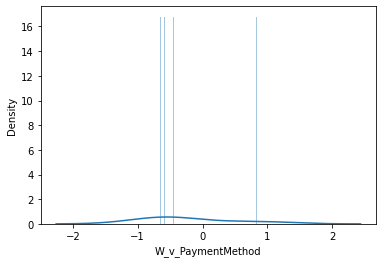

In [57]:
sns.distplot(aux["W_v_PaymentMethod"], bins=100)

In [206]:
#tabla contingencia


In [58]:
from scipy.stats import chi2_contingency

In [59]:
def tamaño_efecto(df,col,tgt):
    #GENERAR TABLA DE CONTINGENCIA
    aux=pd.pivot_table(df[[col,tgt]],values=tgt,columns=col,aggfunc="count").T.reset_index()

    aux.columns=[col,"count"]
    aux1=pd.pivot_table(df[[col,tgt]],values=tgt,columns=col,aggfunc="sum").T.reset_index()
    aux1.columns=[col,"buenos"]
    aux=aux.merge(aux1,on=col)

    aux["malos"]=aux["count"]-aux["buenos"]
    #CHI CUADRADA
    df_chi = np.array(aux[['buenos', 'malos']])
    n = aux['count'].sum()
    chi = stats.chi2_contingency(df_chi)
    p_value=chi[1]
    estadistico=chi[0]
    cramers_v = np.sqrt(estadistico / n)
    x=cramers_v
    interpretacion="alto" if x>=.4 else "medio" if .25<=x and x<.4 else "bajo" if x<.25 and x>=.1 else "insuficiente"
    df=pd.DataFrame({"feats":[col],"p_value":[p_value],"tamaño_efecto":[cramers_v],"efe_interpre":[interpretacion]})
    
    return df

In [74]:
columns=['v_gender', 'v_SeniorCitizen', 'v_Partner', 'v_Dependents',
       'v_PhoneService', 'v_MultipleLines', 'v_InternetService',
       'v_OnlineSecurity', 'v_OnlineBackup', 'v_DeviceProtection',
       'v_TechSupport', 'v_StreamingTV', 'v_StreamingMovies', 'v_Contract',
       'v_PaperlessBilling', 'v_PaymentMethod', 'v_arbol_tenure',
       'v_arbol_MonthlyCharges', 'v_arbol_TotalCharges', 'W_v_gender',
       'W_v_SeniorCitizen', 'W_v_Partner', 'W_v_Dependents',
       'W_v_PhoneService', 'W_v_MultipleLines', 'W_v_InternetService',
       'W_v_OnlineSecurity', 'W_v_OnlineBackup', 'W_v_DeviceProtection',
       'W_v_TechSupport', 'W_v_StreamingTV', 'W_v_StreamingMovies',
       'W_v_Contract', 'W_v_PaperlessBilling', 'W_v_PaymentMethod',
       'W_v_arbol_tenure', 'W_v_arbol_MonthlyCharges',
       'W_v_arbol_TotalCharges']

In [75]:

tamaño_efecto(X_train,'v_StreamingMovies','Churn')

,feats,p_value,tamaño_efecto,efe_interpre
0,v_StreamingMovies,2.160302e-59,0.226331,bajo


In [76]:
efecto=pd.DataFrame()


In [77]:
for col in columns:
    print(col)
    aux=tamaño_efecto(X_train,col,"Churn")
    efecto=pd.concat([efecto,aux])
efecto.reset_index(drop=True,inplace=True)

v_gender
v_SeniorCitizen
v_Partner
v_Dependents
v_PhoneService
v_MultipleLines
v_InternetService
v_OnlineSecurity
v_OnlineBackup
v_DeviceProtection
v_TechSupport
v_StreamingTV
v_StreamingMovies
v_Contract
v_PaperlessBilling
v_PaymentMethod
v_arbol_tenure
v_arbol_MonthlyCharges
v_arbol_TotalCharges
W_v_gender
W_v_SeniorCitizen
W_v_Partner
W_v_Dependents
W_v_PhoneService
W_v_MultipleLines
W_v_InternetService
W_v_OnlineSecurity
W_v_OnlineBackup
W_v_DeviceProtection
W_v_TechSupport
W_v_StreamingTV
W_v_StreamingMovies
W_v_Contract
W_v_PaperlessBilling
W_v_PaymentMethod
W_v_arbol_tenure
W_v_arbol_MonthlyCharges
W_v_arbol_TotalCharges


In [78]:
efecto

,feats,p_value,tamaño_efecto,efe_interpre
0,v_gender,1.218429e-01,0.021303,insuficiente
1,v_SeniorCitizen,1.686873e-27,0.149614,bajo
2,v_Partner,1.588325e-29,0.155368,bajo
3,v_Dependents,1.612583e-33,0.166136,bajo
4,v_PhoneService,7.330862e-01,0.004696,insuficiente
5,v_MultipleLines,5.933515e-02,0.032728,insuficiente
6,v_InternetService,1.153103e-115,0.316800,medio
7,v_OnlineSecurity,2.017078e-136,0.344219,medio
8,v_OnlineBackup,8.312583e-99,0.292647,medio
9,v_DeviceProtection,2.485393e-92,0.282821,medio


In [79]:
importancia=efecto.merge(data_iv,on="feats")

In [91]:
importancia



,feats,p_value,tamaño_efecto,efe_interpre,iv,iv_inter
0,v_gender,1.218429e-01,0.021303,insuficiente,0.002420,insuficiente
1,v_SeniorCitizen,1.686873e-27,0.149614,bajo,0.104883,medio
2,v_Partner,1.588325e-29,0.155368,bajo,0.127322,medio
3,v_Dependents,1.612583e-33,0.166136,bajo,0.160596,medio
4,v_PhoneService,7.330862e-01,0.004696,insuficiente,0.000152,insuficiente
5,v_MultipleLines,5.933515e-02,0.032728,insuficiente,0.005464,insuficiente
6,v_InternetService,1.153103e-115,0.316800,medio,0.592956,sospechoso
7,v_OnlineSecurity,2.017078e-136,0.344219,medio,0.701197,sospechoso
8,v_OnlineBackup,8.312583e-99,0.292647,medio,0.521335,sospechoso
9,v_DeviceProtection,2.485393e-92,0.282821,medio,0.494889,alto


In [81]:
importancia.corr()

,p_value,tamaño_efecto,iv
p_value,1.000000,-0.559409,-0.377323
tamaño_efecto,-0.559409,1.000000,0.927366
iv,-0.377323,0.927366,1.000000


In [84]:
#tablas finales

In [85]:
importancia.sort_values(by="tamaño_efecto",ascending=False)["feats"].values

array(['v_Contract', 'v_arbol_tenure', 'v_TechSupport',
       'v_OnlineSecurity', 'v_InternetService', 'v_PaymentMethod',
       'v_OnlineBackup', 'v_DeviceProtection', 'v_arbol_MonthlyCharges',
       'v_arbol_TotalCharges', 'v_StreamingMovies', 'v_StreamingTV',
       'v_PaperlessBilling', 'v_Dependents', 'v_Partner',
       'v_SeniorCitizen', 'v_MultipleLines', 'v_gender', 'v_PhoneService'],
      dtype=object)

In [86]:
X_train.columns

Index(['v_gender', 'v_SeniorCitizen', 'v_Partner', 'v_Dependents',
       'v_PhoneService', 'v_MultipleLines', 'v_InternetService',
       'v_OnlineSecurity', 'v_OnlineBackup', 'v_DeviceProtection',
       'v_TechSupport', 'v_StreamingTV', 'v_StreamingMovies', 'v_Contract',
       'v_PaperlessBilling', 'v_PaymentMethod', 'v_arbol_tenure',
       'v_arbol_MonthlyCharges', 'v_arbol_TotalCharges', 'Churn', 'W_v_gender',
       'W_v_SeniorCitizen', 'W_v_Partner', 'W_v_Dependents',
       'W_v_PhoneService', 'W_v_MultipleLines', 'W_v_InternetService',
       'W_v_OnlineSecurity', 'W_v_OnlineBackup', 'W_v_DeviceProtection',
       'W_v_TechSupport', 'W_v_StreamingTV', 'W_v_StreamingMovies',
       'W_v_Contract', 'W_v_PaperlessBilling', 'W_v_PaymentMethod',
       'W_v_arbol_tenure', 'W_v_arbol_MonthlyCharges',
       'W_v_arbol_TotalCharges'],
      dtype='object')

In [88]:
X_train=X_train[list(X_train.filter(like="W_").columns)+["Churn"]]
X_test=X_test[list(X_test.filter(like="W_").columns)+["Churn"]]

In [89]:
X_test

,W_v_gender,W_v_SeniorCitizen,W_v_Partner,W_v_Dependents,W_v_PhoneService,W_v_MultipleLines,W_v_InternetService,W_v_OnlineSecurity,W_v_OnlineBackup,W_v_DeviceProtection,W_v_TechSupport,W_v_StreamingTV,W_v_StreamingMovies,W_v_Contract,W_v_PaperlessBilling,W_v_PaymentMethod,W_v_arbol_tenure,W_v_arbol_MonthlyCharges,W_v_arbol_TotalCharges,Churn
0,-0.049396,-0.158986,0.318864,0.232425,0.003985,-0.068255,0.677632,-0.765853,-0.297688,-0.253889,0.684094,0.325525,0.335646,0.726191,0.326512,-0.655027,-0.300553,0.544852,0.091028,0
1,0.049009,-0.158986,0.318864,0.232425,0.003985,-0.068255,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,-1.474832,0.726191,0.326512,-0.451477,1.627140,-1.253516,1.015871,0
2,-0.049396,-0.158986,0.318864,0.232425,0.003985,-0.068255,0.677632,0.675248,0.617647,0.584543,0.684094,0.164541,0.158175,0.726191,-0.618826,0.834385,-0.300553,0.258404,0.091028,0
3,-0.049396,-0.158986,-0.403570,0.232425,0.003985,0.085238,0.677632,0.675248,-0.297688,-0.253889,0.684094,0.164541,0.335646,0.726191,-0.618826,0.834385,-0.300553,0.622646,0.091028,1
4,-0.049396,-0.158986,-0.403570,0.232425,0.003985,0.085238,0.677632,0.675248,-0.297688,-0.253889,0.684094,0.164541,0.335646,-1.168488,0.326512,-0.585198,-2.255709,0.622646,-0.990999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,-0.049396,-0.158986,0.318864,0.232425,0.003985,-0.068255,-0.431217,-0.765853,0.617647,-0.253889,-0.772825,0.164541,0.335646,0.726191,0.326512,0.834385,-0.039569,-1.047484,-0.459263,0
1754,0.049009,0.665483,0.318864,0.232425,0.003985,0.085238,0.677632,-0.765853,-0.297688,-0.253889,0.684094,0.164541,0.158175,-1.168488,0.326512,0.834385,-0.558285,-0.275387,-0.486898,1
1755,-0.049396,-0.158986,0.318864,0.232425,0.003985,0.085238,0.677632,0.675248,0.617647,-0.253889,-0.772825,0.164541,0.158175,0.726191,0.326512,-0.451477,-0.039569,0.622646,0.091028,1
1756,-0.049396,-0.158986,0.318864,0.232425,0.003985,-0.068255,0.677632,0.675248,0.617647,0.584543,0.684094,0.325525,0.335646,0.726191,0.326512,-0.451477,0.479343,0.544852,0.048556,1


In [96]:
X_train.drop(columns=['W_v_gender','W_v_PhoneService','W_v_MultipleLines'],inplace=True)
X_test.drop(columns=['W_v_gender','W_v_PhoneService','W_v_MultipleLines'],inplace=True)

